In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
delta_t = 1


In [7]:
# Model
def model(r_E, r_I, u_E, u_I, W_EE):
    Beta = 1
    Tau_E = 10
    Tau_I = 10
    W_EI = 1.8
    W_IE = 1.8
    W_II = 1
    drEdt = (-r_E + Beta*((W_EE*r_E)-(W_EI*r_I) + u_E))/Tau_E
    drIdt = (-r_I + Beta*((W_IE*r_E)-(W_II*r_I) + u_I))/Tau_I
    return [drEdt, drIdt]

# Network 1
def network1(r_E, r_I, u_E, u_I):
    W_EE=0.5
    return model(r_E, r_I, u_E, u_I, W_EE=W_EE)

def network2(r_E, r_I, u_E, u_I):
    W_EE=1.5
    return model(r_E, r_I, u_E, u_I, W_EE=W_EE)

In [282]:
def simulate(network, t, u_E, u_I, h, r_E_in=0, r_I_in=0, update_i=True, update_e=True):
    r_E = np.zeros(len(t))
    r_I = np.zeros(len(t))

    r_E[0] = r_E_in
    r_I[0] = r_I_in
    for i in range(1, len(t)):
        drEdt, drIdt = network(r_E[i-1], r_I[i-1], u_E=u_E, u_I=u_I)

        if update_i:
            r_E[i] = r_E[i-1] + drEdt * h
        else:
            r_E[i] = r_E[i-1]

        if update_e:
            r_I[i] = r_I[i-1] + drIdt * h
        else:
            r_I[i] = r_I[i-1]

    return r_E, r_I


# Question 1
The model is biologically relevant in that Sanzeni et al., 2020 showed experimentally that inhibitory stabilisation and paridoxical inhibition, as demonstrated by this model, actually happens in the brain
This model is restrictive and is considered biologically unrealistic as it does not model individual neurons, but instead models a network of neurons, described by:
An average inhibitory firing rate, r_I;
An average excitatory firing rate, r_E;
Weights representing strength of interactions between excitatory and inhibitory neurons in the network, W_EE, W_IE, W_EI, W_II;
\Beta representing the activity level of the network;
External inputs to excitatory neurons, u_E;
And external inputs to inhibitory neurons, u_I.

Single neuron models can be computationally expensive (Hodgkin-Huxley), and may not be able to be easily solved analytically when attempting to model multiple neurons with them. Neuron network models can use approximations such as an average firing rate, and although it may not be biologically realistic, it may be easier to solve analytically.


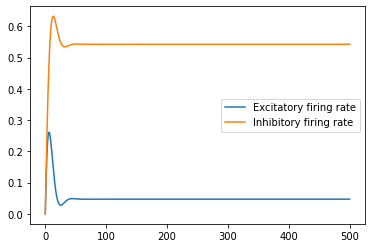

In [229]:
# Question 2
N_t = 500
u_E = 1
u_I = 1
h = 0.01
network=network1

t = np.linspace(0, N_t, int(N_t/h)+1)
r_E, r_I = simulate(network=network1,
                    t=t,
                    u_E=u_E,
                    u_I=u_I,
                    h=h)

plt.plot(t, r_E, label='Excitatory firing rate')
plt.plot(t, r_I, label='Inhibitory firing rate')
plt.legend()
plt.savefig('figures/question2.pdf')

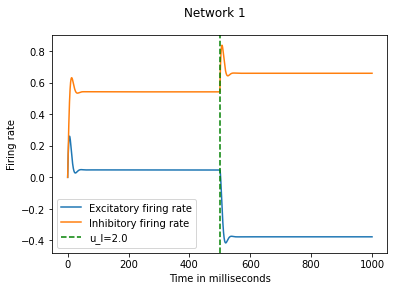

In [244]:
# Question 3
N_t = 1000
u_E = 1
h = 0.01
network=network1

t = np.linspace(0, N_t, int(N_t/h))

half_index = len(t)//2
r_E_1, r_I_1 = simulate(network=network,
                    t=t[:half_index],
                    u_E=u_E,
                    u_I=1.0,
                    h=h)

r_E_2, r_I_2 =  simulate(network=network,
                    t=t[half_index:],
                    u_E=u_E,
                    u_I=2.0,
                    h=h,
                    r_E_in=r_E_1[-1],
                    r_I_in=r_I_1[-1])

r_E_net1 = np.concatenate([r_E_1, r_E_2])
r_I_net1 = np.concatenate([r_I_1, r_I_2])

plt.plot(t, r_E_net1, label='Excitatory firing rate')
plt.plot(t, r_I_net1, label='Inhibitory firing rate')


plt.axvline(x=500, c='g', linestyle='--', label='u_I=2.0')

plt.legend()
plt.suptitle("Network 1")
plt.xlabel("Time in milliseconds")
plt.ylabel("Firing rate")
plt.savefig('figures/question3.pdf')

u_I is the average external input received by inhibitory neurons in the network. When this is increased in network 1, as expected, the inhibitory firing rate increases, whilst the excitatory firing rate drops due to the increased inhibition firing rate.


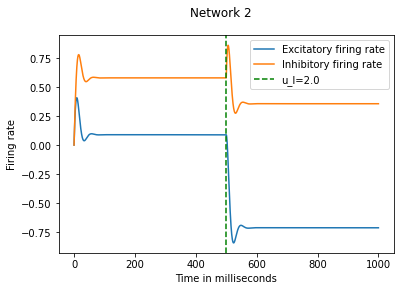

In [245]:
# Question 4
N_t = 1000
u_E = 1
h = 0.01
network=network2

t = np.linspace(0, N_t, int(N_t/h))

half_index = len(t)//2
r_E_1, r_I_1 = simulate(network=network,
                    t=t[:half_index],
                    u_E=u_E,
                    u_I=1.0,
                    h=h)

r_E_2, r_I_2 =  simulate(network=network,
                    t=t[half_index:],
                    u_E=u_E,
                    u_I=2.0,
                    h=h,
                    r_E_in=r_E_1[-1],
                    r_I_in=r_I_1[-1])

r_E_net2 = np.concatenate([r_E_1, r_E_2])
r_I_net2 = np.concatenate([r_I_1, r_I_2])

plt.plot(t, r_E_net2, label='Excitatory firing rate')
plt.plot(t, r_I_net2, label='Inhibitory firing rate')

plt.axvline(x=500, c='g', linestyle='--', label='u_I=2.0')

plt.legend()
plt.suptitle("Network 2")
plt.xlabel("Time in milliseconds")
plt.ylabel("Firing rate")
plt.savefig('figures/question4.pdf')

When the average external input received by inhibitory neurons in network 2 is increased, paradoxically, the inhibitory firing rate decreases along with the excitatory firing rate. This is paradoxical as an increase in inputs to inhibitory neurons should normally lead to a larger firing rate from these neurons. In networks such as network 2 though, the reasoning for a decrease in inhibitory firing rate goes as follows:
When the inhibition input increases, this increases inhibition of excitatory neurons, leading to decrease in excitation for inhibitory cells, leading to a decreased average inhibitory firing rate.

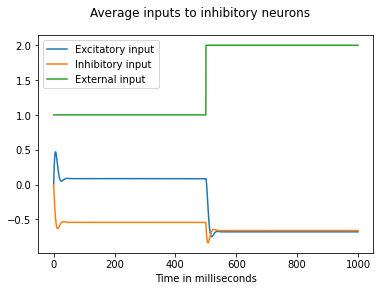

In [260]:
# Question 5
# Network 1
W_IE = 1.8
W_II = 1.0
inputs_e_1 = W_IE*r_E_net1
inputs_i_1 = -W_II*r_I_net1
external_i_1 = np.concatenate([np.ones(half_index),2*np.ones(half_index)])

plt.plot(t, inputs_e_1, label='Excitatory input')
plt.plot(t, inputs_i_1, label='Inhibitory input')
plt.plot(t, external_i_1, label='External input')
plt.xlabel("Time in milliseconds")
plt.legend()
plt.suptitle("Average inputs to inhibitory neurons")
plt.savefig('figures/question5_network1.pdf')

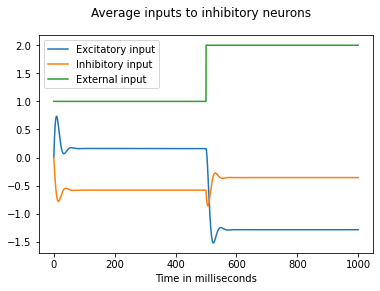

In [258]:
# Network 2
W_IE = 1.8
W_II = 1.0
inputs_e_2 = W_IE*r_E_net2
inputs_i_2 = -W_II*r_I_net2
external_i_2 = np.concatenate([np.ones(half_index),2*np.ones(half_index)])

plt.plot(t, inputs_e_2, label='Excitatory input')
plt.plot(t, inputs_i_2, label='Inhibitory input')
plt.plot(t, external_i_2, label='External input')
plt.xlabel("Time in milliseconds")
plt.legend()
plt.suptitle("Average inputs to inhibitory neurons")
plt.savefig('figures/question5_network2.pdf')

In network 1, the increase in external input to inhibitory neurons causes a large decrease in I neuron's excitatory inputs, and a small decrease in I neuron's inhibitory input, leading to more inhibitory activity in the network as a whole.
In network 2, the increase in external input to I neurons causes an even larger decrease in I neuron's excitatory inputs.

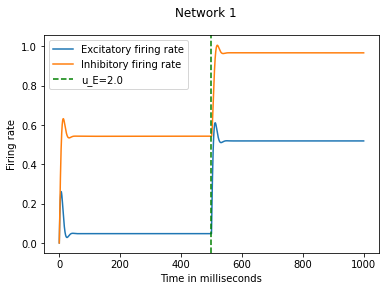

In [264]:
# Question 6
N_t = 1000
u_I = 1.0
h = 0.01
network=network1

t = np.linspace(0, N_t, int(N_t/h))

half_index = len(t)//2
r_E_1, r_I_1 = simulate(network=network,
                    t=t[:half_index],
                    u_E=1.0,
                    u_I=u_I,
                    h=h)

r_E_2, r_I_2 =  simulate(network=network,
                    t=t[half_index:],
                    u_E=2.0,
                    u_I=u_I,
                    h=h,
                    r_E_in=r_E_1[-1],
                    r_I_in=r_I_1[-1])

r_E_net1 = np.concatenate([r_E_1, r_E_2])
r_I_net1 = np.concatenate([r_I_1, r_I_2])

plt.plot(t, r_E_net1, label='Excitatory firing rate')
plt.plot(t, r_I_net1, label='Inhibitory firing rate')


plt.axvline(x=500, c='g', linestyle='--', label='u_E=2.0')

plt.legend()
plt.suptitle("Network 1")
plt.xlabel("Time in milliseconds")
plt.ylabel("Firing rate")
plt.savefig('figures/question6network1.pdf')

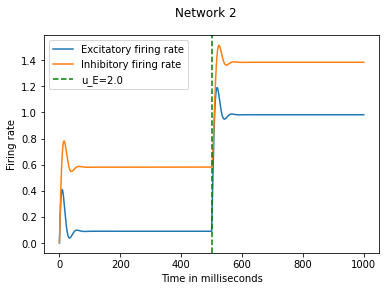

In [263]:
N_t = 1000
u_I = 1.0
h = 0.01
network=network2

t = np.linspace(0, N_t, int(N_t/h))

half_index = len(t)//2
r_E_1, r_I_1 = simulate(network=network,
                    t=t[:half_index],
                    u_E=1.0,
                    u_I=u_I,
                    h=h)

r_E_2, r_I_2 =  simulate(network=network,
                    t=t[half_index:],
                    u_E=2.0,
                    u_I=u_I,
                    h=h,
                    r_E_in=r_E_1[-1],
                    r_I_in=r_I_1[-1])

r_E_net2 = np.concatenate([r_E_1, r_E_2])
r_I_net2 = np.concatenate([r_I_1, r_I_2])

plt.plot(t, r_E_net2, label='Excitatory firing rate')
plt.plot(t, r_I_net2, label='Inhibitory firing rate')

plt.axvline(x=500, c='g', linestyle='--', label='u_E=2.0')

plt.legend()
plt.suptitle("Network 2")
plt.xlabel("Time in milliseconds")
plt.ylabel("Firing rate")
plt.savefig('figures/question6network2.pdf')

An increase in external excitatory input to network 1 causes a large increase in both excitatory and inhibitory firing rate, with the inhibitory firing rate adjusting closely to the original excitatory firing rate.
In network 2, and increase in external excitatory input causes a large increase in the firing rates of both types of neuron, though both are excited to a larger degree than in network 1.

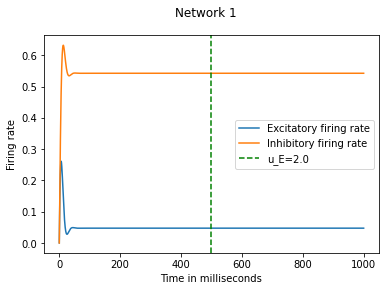

In [283]:
# Question 7
# Network 1
N_t = 1000
u_I = 1.0
h = 0.01
network=network1

t = np.linspace(0, N_t, int(N_t/h))

half_index = len(t)//2
r_E_1, r_I_1 = simulate(network=network,
                    t=t[:half_index],
                    u_E=1.0,
                    u_I=u_I,
                    h=h)


r_E_2, r_I_2 =  simulate(network=network,
                    t=t[half_index:],
                    u_E=2.0,
                    u_I=u_I,
                    h=h,
                    r_E_in=r_E_1[-1],
                    r_I_in=r_I_1[-1],
                    update_i=False)

r_E_net2 = np.concatenate([r_E_1, r_E_2])
r_I_net2 = np.concatenate([r_I_1, r_I_2])

plt.plot(t, r_E_net2, label='Excitatory firing rate')
plt.plot(t, r_I_net2, label='Inhibitory firing rate')

plt.axvline(x=500, c='g', linestyle='--', label='u_E=2.0')

plt.legend()
plt.suptitle("Network 1")
plt.xlabel("Time in milliseconds")
plt.ylabel("Firing rate")
plt.savefig('figures/question7network1.pdf')

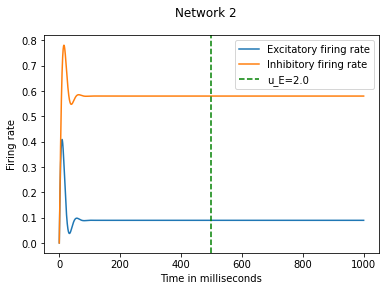

In [281]:
# Network 2
N_t = 1000
u_I = 1.0
h = 0.01
network=network2

t = np.linspace(0, N_t, int(N_t/h))

half_index = len(t)//2
r_E_1, r_I_1 = simulate(network=network,
                    t=t[:half_index],
                    u_E=1.0,
                    u_I=u_I,
                    h=h)


r_E_2, r_I_2 =  simulate(network=network,
                    t=t[half_index:],
                    u_E=2.0,
                    u_I=u_I,
                    h=h,
                    r_E_in=r_E_1[-1],
                    r_I_in=r_I_1[-1],
                    update_i=False)

r_E_net2 = np.concatenate([r_E_1, r_E_2])
r_I_net2 = np.concatenate([r_I_1, r_I_2])

plt.plot(t, r_E_net2, label='Excitatory firing rate')
plt.plot(t, r_I_net2, label='Inhibitory firing rate')

plt.axvline(x=500, c='g', linestyle='--', label='u_E=2.0')

plt.legend()
plt.suptitle("Network 2")
plt.xlabel("Time in milliseconds")
plt.ylabel("Firing rate")
plt.savefig('figures/question7network2.pdf')

If the Excitatory firing rate is fixed, the inhibitory firing rate remains constant also.

In [ ]:
# Question 8